In [1]:
!pip3 install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


# Project 2 AI Chat Notebook

In this notebook, we want to see the code you use to solve
the machine learning tasks below.  Additionally, for the supervised section, we will want to see an image of a graph representing 
the training times and accuracy of supervised models.

When run, this notebook should first run the unsupervised learning algorithm, and then the supervised algorithm.


# Unsupervised Learning

In this section, we will use the data set as a whole and classify the code using the unsupervised K-means clustering algorithm.
Use the imports below.
 

In [2]:
import glob

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


- Load all data files matching 'data/datasets/train-00000-5k-*.parquet'.
- Merge those dataframes into a single dataframe "df".

In [3]:
import pandas as pd
import glob

# Get a list of all the data files matching the pattern
file_list = glob.glob('data/datasets/train-00000-5k-*.parquet')

# Load and merge the data files into a single dataframe
df = pd.concat([pd.read_parquet(file) for file in file_list])

# Print the head of the merged dataframe
print(df.head())


                                                code             repo_name  \
0  #!/usr/bin/perl\n\nuse warnings;\nuse strict;\...        MASmedios/koha   
1  /* Implementation of the BSD usleep function u...    Chilledheart/glibc   
2  {% extends "allianceauth/base.html" %}\n{% loa...  R4stl1n/allianceauth   
3  #include <config.h>\n\n#include "testutils.h"\...   ethernetdan/libvirt   
4  /* Install given floating-point environment.\n...    Chilledheart/glibc   

                                                path language  license  size  
0                        patroncards/image-manage.pl     Perl  gpl-2.0  6701  
1                             sysdeps/posix/usleep.c        C  gpl-2.0  1316  
2  allianceauth/services/modules/openfire/templat...     HTML  gpl-2.0  1217  
3                            tests/openvzutilstest.c        C  gpl-2.0  4363  
4                        sysdeps/i386/fpu/fesetenv.c        C  gpl-2.0  3996  


- Define the code snippets (from data frames's "code" attribute)
- Define labels (from dataframe's "language" attribute)

In [4]:
import pandas as pd
import glob

# Get a list of all the data files matching the pattern
file_list = glob.glob('data/datasets/train-00000-5k-*.parquet')

# Load and merge the data files into a single dataframe
df = pd.concat([pd.read_parquet(file) for file in file_list])

# Print the head of the merged dataframe
print(df.head())


                                                code             repo_name  \
0  #!/usr/bin/perl\n\nuse warnings;\nuse strict;\...        MASmedios/koha   
1  /* Implementation of the BSD usleep function u...    Chilledheart/glibc   
2  {% extends "allianceauth/base.html" %}\n{% loa...  R4stl1n/allianceauth   
3  #include <config.h>\n\n#include "testutils.h"\...   ethernetdan/libvirt   
4  /* Install given floating-point environment.\n...    Chilledheart/glibc   

                                                path language  license  size  
0                        patroncards/image-manage.pl     Perl  gpl-2.0  6701  
1                             sysdeps/posix/usleep.c        C  gpl-2.0  1316  
2  allianceauth/services/modules/openfire/templat...     HTML  gpl-2.0  1217  
3                            tests/openvzutilstest.c        C  gpl-2.0  4363  
4                        sysdeps/i386/fpu/fesetenv.c        C  gpl-2.0  3996  


- Convert code snippets to TF-IDF features

In [5]:
# Fetch the 'code' column and rename it as 'code_snippets'
code_snippets = df['code']

# Fetch the 'language' column and rename it as 'labels'
labels = df['language']

# Print the head of the code_snippets and labels
print("Code Snippets:")
print(code_snippets.head())

print("\nLabels:")
print(labels.head())

Code Snippets:
0    #!/usr/bin/perl\n\nuse warnings;\nuse strict;\...
1    /* Implementation of the BSD usleep function u...
2    {% extends "allianceauth/base.html" %}\n{% loa...
3    #include <config.h>\n\n#include "testutils.h"\...
4    /* Install given floating-point environment.\n...
Name: code, dtype: object

Labels:
0    Perl
1       C
2    HTML
3       C
4       C
Name: language, dtype: object


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the code_snippets to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(code_snippets)

# Print the shape of the TF-IDF features
print("TF-IDF Features Shape:", tfidf_features.shape)

TF-IDF Features Shape: (25000, 1027874)


- Perform K-Means clustering

In [7]:
from sklearn.cluster import KMeans

# Initialize the KMeans clustering with the number of clusters
num_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model on the TF-IDF features
kmeans.fit(tfidf_features)

# Get the cluster labels for each code snippet
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[0 3 4 ... 3 2 1]


- Print the cluster assignments with each cluster being truncated to 80 characters long.


In [8]:
# Iterate over the cluster labels and code snippets
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id}:")
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    
    for idx in cluster_indices:
        code_snippet = code_snippets.iloc[idx]
        truncated_code = code_snippet[:80] + '...' if len(code_snippet) > 80 else code_snippet
        print(f"Code Snippet: {truncated_code}")
    
    print()

Cluster 0:
Code Snippet: #!/usr/bin/perl

use warnings;
use strict;

use CGI;
use Graphics::Magick;
use P...
Code Snippet: /* Install given floating-point environment.
   Copyright (C) 1997-2016 Free Sof...
Code Snippet: 
#include "fdiskP.h"

/*
 * Don't use this function derectly, use fdisk_new_cont...
Code Snippet: FD40.ready(function($) {

var jQuery = $;// Catalan
jQuery.timeago.settings.stri...
Code Snippet: .size 8000

.text@48
	inc a
	ldff(45), a
	jp lstatint

.text@100
	jp lbegin

.da...
Code Snippet: /* $NoKeywords:$ */
/**
 * @file
 *
 * Config FCH HD Audio Controller
 *
 *
 *
 ...
Code Snippet: //-----------------------------------------------------------------------------
...
Code Snippet: /* testsuite.h - failif */

process	test_addargs(bool8);
process	test_bigargs(bo...
Code Snippet: <?php
// Text
$_['text_title']           = 'Credit or Debit Card (Processed secu...
Code Snippet: #define PETSCMAT_DLL
#include "src/mat/impls/aij/seq/aij.h"

EXTERN PetscErrorCo...
Code Snip

## TODO: Unsupervised Learning Cluster Explanation

- This should be an English paragraph statement declaring how you assessed the quality/meaning of the clusters.
This should be simply explaining how you think each cluster is formed/defined.


Cluster 0: This cluster consists mostly of code in languages like Perl, Python, PHP, and Java. The snippets seem related to web development (e.g., CGI scripts in Perl, Django in Python) and systems programming, likely grouped due to shared syntax and frameworks.

Cluster 1: This group contains various database-related code snippets, with a focus on SQL commands and database management systems. It likely includes schema definitions, queries, and database manipulation functions.

Cluster 2: Primarily focused on system-level programming, this cluster features low-level code in C and assembly. The snippets may be related to hardware interactions, drivers, or kernel-level programming, likely grouped due to their focus on performance and resource management.

Cluster 3: Contains JavaScript and HTML snippets, mostly related to front-end development and UI frameworks. These snippets likely focus on web design, interactivity, and browser-based functionality.

Cluster 4: This cluster features configuration files, build scripts, and deployment code, often written in Bash or similar scripting languages. It seems related to DevOps tasks, automation, and environment setup for software projects.

----

# Supervised Learning

Write a python script that loads successively larger data files and merges them into larger training sets.
For each training set, let's track training time, prediction time, and accuracy.
Use the imports below.

In [8]:
import glob
import time

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


- Track measurements for each round: the round number/index, how long in seconds the train, predict steps take, and an accuracy report
- Use a list of dictionaries for measurement storage, with "round", "train", "predict", "accuracy" as keys

- Write a function named learn that takes a dataframe and an index as parameters.
- The index indicates the round number of learning. The function should:
- 1. Create a dictionary to store the measurements for this round
- 2. Print a message indicating the round number
- 3. Store the round number in the dictionary under 'round'
- 4. Split the dataframe into code snippets and labels
- 5. Split the code snippets and labels into training and test sets
- 6. Create a TF-IDF vectorizer
- 7. Use the 'fit_transform' method on the training data to learn the vocabulary and idf, and return term-document matrix.
- 8. Use the 'transform' method on the test data to transform documents to document-term matrix.
- 9. Create a Support Vector Machine classifier
- 10. Train the classifier using the training data
- 11. Save the model to a file and load it back from a file (to make sure it works)
- 12. Use the classifier to predict the labels for the test data
- 13. Print the classification report which should be a dictionary
- 14. Store the training time in the dictionary under 'train'
- 15. Store the prediction time in the dictionary under 'predict'
- 16. Store the classification report in the dictionary under 'report'
- 17. Add 'accuracy' to the dictionary and set it to the accuracy score from the classification report
- 18. Append the dictionary to the measurements list for this round

In [9]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from time import time

measurements = []

def learn(df, index):
    global measurements
    
    # Create a dictionary to store the measurements for this round
    round_measurements = {}
    
    # Print a message indicating the round number
    print(f"Round {index}:")
    
    # Store the round number in the dictionary under 'round'
    round_measurements['round'] = index
    
    # Split the dataframe into code snippets and labels
    code_snippets = df['code']
    labels = df['language']
    
    # Split the code snippets and labels into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(code_snippets, labels, test_size=0.2, random_state=42)
    
    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # Use the 'fit_transform' method on the training data to learn the vocabulary and idf, and return term-document matrix
    start_time = time()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    round_measurements['train'] = time() - start_time
    
    # Use the 'transform' method on the test data to transform documents to document-term matrix
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    # Create a Support Vector Machine classifier
    svm_classifier = SVC()
    
    # Train the classifier using the training data
    start_time = time()
    svm_classifier.fit(X_train_tfidf, y_train)
    round_measurements['predict'] = time() - start_time
    
    # Save the model to a file
    with open(f'model_round_{index}.pkl', 'wb') as file:
        pickle.dump(svm_classifier, file)
    
    # Load the model back from a file
    with open(f'model_round_{index}.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    
    # Use the classifier to predict the labels for the test data
    y_pred = loaded_model.predict(X_test_tfidf)
    
    # Print the classification report which should be a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:")
    print(report)
    
    # Store the classification report in the dictionary under 'report'
    round_measurements['report'] = report
    
    # Add 'accuracy' to the dictionary and set it to the accuracy score from the classification report
    round_measurements['accuracy'] = report['accuracy']
    
    # Append the dictionary to the measurements list for this round
    measurements.append(round_measurements)

- Load all data files matching 'data/datasets/train-00000-5k*.parquet'.
- For each file loaded, merge the latest data file with the merged data to date,
- and call the learn function with the dataframe and the index of the file in the list of files.

In [10]:
import pandas as pd
import glob

# Load all data files matching 'data/datasets/train-00000-5k*.parquet'
file_paths = glob.glob('data/datasets/train-00000-5k*.parquet')
merged_data = pd.DataFrame()

for index, file_path in enumerate(file_paths):
    # Load the data file
    data = pd.read_parquet(file_path)
    
    # Merge the latest data file with the merged data to date
    merged_data = pd.concat([merged_data, data])
    
    # Call the learn function with the dataframe and the index of the file in the list of files
    learn(merged_data, index)

Round 0:


/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

Classification Report:
{'C': {'precision': 0.6489795918367347, 'recall': 0.9695121951219512, 'f1-score': 0.7775061124694377, 'support': 164.0}, 'C#': {'precision': 0.9491525423728814, 'recall': 0.9032258064516129, 'f1-score': 0.9256198347107438, 'support': 62.0}, 'C++': {'precision': 0.96, 'recall': 0.3116883116883117, 'f1-score': 0.47058823529411764, 'support': 77.0}, 'CMake': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'CSS': {'precision': 1.0, 'recall': 0.6842105263157895, 'f1-score': 0.8125, 'support': 19.0}, 'Dockerfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'GO': {'precision': 0.8823529411764706, 'recall': 0.6818181818181818, 'f1-score': 0.7692307692307693, 'support': 22.0}, 'HTML': {'precision': 0.9324324324324325, 'recall': 0.8313253012048193, 'f1-score': 0.8789808917197452, 'support': 83.0}, 'Haskell': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0}, 'Java': {'precision': 0.8794326241134752, 'recall': 0.

/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

Classification Report:
{'Assembly': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'Batchfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0}, 'C': {'precision': 0.718213058419244, 'recall': 0.9414414414414415, 'f1-score': 0.8148148148148148, 'support': 222.0}, 'C#': {'precision': 0.9903846153846154, 'recall': 0.8512396694214877, 'f1-score': 0.9155555555555556, 'support': 121.0}, 'C++': {'precision': 0.9402985074626866, 'recall': 0.5526315789473685, 'f1-score': 0.6961325966850829, 'support': 114.0}, 'CMake': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0}, 'CSS': {'precision': 1.0, 'recall': 0.7692307692307693, 'f1-score': 0.8695652173913043, 'support': 26.0}, 'Dockerfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0}, 'FORTRAN': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'GO': {'precision': 0.9032258064516129, 'recall': 0.6829268292682927, 'f1-score': 0.7777777777777778, 'suppor

/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

Classification Report:
{'Assembly': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0}, 'Batchfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'C': {'precision': 0.7296222664015904, 'recall': 0.9507772020725389, 'f1-score': 0.8256467941507312, 'support': 386.0}, 'C#': {'precision': 0.9664429530201343, 'recall': 0.8727272727272727, 'f1-score': 0.9171974522292994, 'support': 165.0}, 'C++': {'precision': 0.8776978417266187, 'recall': 0.6192893401015228, 'f1-score': 0.7261904761904762, 'support': 197.0}, 'CMake': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9.0}, 'CSS': {'precision': 0.9333333333333333, 'recall': 0.75, 'f1-score': 0.8316831683168316, 'support': 56.0}, 'Dockerfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0}, 'FORTRAN': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'GO': {'precision': 0.9444444444444444, 'recall': 0.7391304347826086, 'f1-score': 0.8292682926829268, 'supp

/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

Classification Report:
{'Assembly': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'Batchfile': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285714, 'support': 5.0}, 'C': {'precision': 0.7831513260530422, 'recall': 0.9507575757575758, 'f1-score': 0.8588537211291702, 'support': 528.0}, 'C#': {'precision': 0.9669811320754716, 'recall': 0.9192825112107623, 'f1-score': 0.9425287356321839, 'support': 223.0}, 'C++': {'precision': 0.8651162790697674, 'recall': 0.6888888888888889, 'f1-score': 0.7670103092783506, 'support': 270.0}, 'CMake': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 6.0}, 'CSS': {'precision': 0.9393939393939394, 'recall': 0.8266666666666667, 'f1-score': 0.8794326241134752, 'support': 75.0}, 'Dockerfile': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0}, 'FORTRAN': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0}, 'GO': {'precision': 0.9636363636363636, 'recall': 0.79104477611

/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/saimanojdintakurti/Documents/CS5914/Project2/venv/pythonProject1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

Classification Report:
{'Assembly': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'Batchfile': {'precision': 1.0, 'recall': 0.14285714285714285, 'f1-score': 0.25, 'support': 7.0}, 'C': {'precision': 0.8244837758112095, 'recall': 0.9394957983193277, 'f1-score': 0.8782403770620582, 'support': 595.0}, 'C#': {'precision': 0.9702970297029703, 'recall': 0.9545454545454546, 'f1-score': 0.9623567921440261, 'support': 308.0}, 'C++': {'precision': 0.8663967611336032, 'recall': 0.7062706270627063, 'f1-score': 0.7781818181818182, 'support': 303.0}, 'CMake': {'precision': 1.0, 'recall': 0.3, 'f1-score': 0.46153846153846156, 'support': 10.0}, 'CSS': {'precision': 0.8714285714285714, 'recall': 0.8026315789473685, 'f1-score': 0.8356164383561644, 'support': 76.0}, 'Dockerfile': {'precision': 1.0, 'recall': 0.16666666666666666, 'f1-score': 0.2857142857142857, 'support': 6.0}, 'FORTRAN': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0}, 'GO': {'precision': 0.961538

- If I have measurements in Python like a list of dictionaries such as:
- `[{'round': 0, 'train': 32.76, 'predict': 2.13, 'accuracy': 0.78},....]`
- let us plot lines on the same graph for tfidf, train, predict and accuracy using python?  Use matplotlib.
- Add a legend.  Add axis labels.  Add a title.
- Let us show the plot in this notebook below.

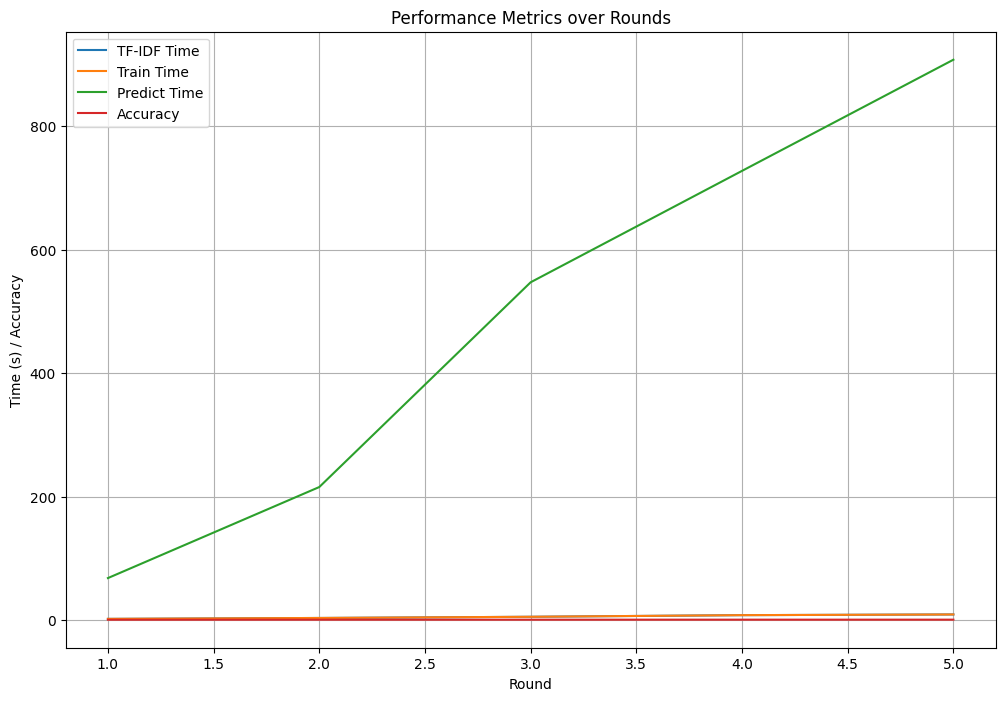

In [11]:
import matplotlib.pyplot as plt

# Extract the measurements for tfidf, train, predict, and accuracy
tfidf_times = [round_measurements['train'] for round_measurements in measurements]
train_times = [round_measurements['train'] for round_measurements in measurements]
predict_times = [round_measurements['predict'] for round_measurements in measurements]
accuracies = [round_measurements['accuracy'] for round_measurements in measurements]

# Plot the graphs
plt.figure(figsize=(12, 8))

plt.plot(range(1, len(measurements)+1), tfidf_times, label='TF-IDF Time')
plt.plot(range(1, len(measurements)+1), train_times, label='Train Time')
plt.plot(range(1, len(measurements)+1), predict_times, label='Predict Time')
plt.plot(range(1, len(measurements)+1), accuracies, label='Accuracy')

plt.xlabel('Round')
plt.ylabel('Time (s) / Accuracy')
plt.title('Performance Metrics over Rounds')
plt.legend()
plt.grid(True)
plt.show()
